In [1]:
from Data import Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
data = Data()
%matplotlib inline

# Let's study the dependence of the default rate on time

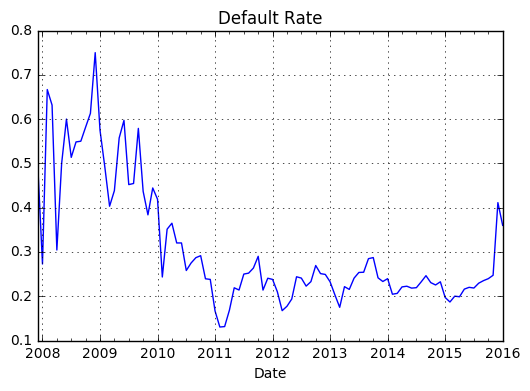

In [5]:
data.df.groupby('Date').default.mean().plot().grid()
plt.title('Default Rate')

### It looks like the default rate is relatively high between 2008-2010. This can be due to financial instability. A good indicator of financial instability is the volatility of the stock market index. Let's plot the volatility of the S&P 500 index for the same period

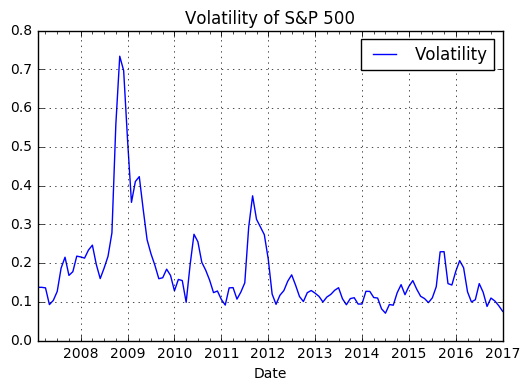

In [6]:
data.dfvol.plot().grid()
plt.title('Volatility of S&P 500')

### It looks like there is correlation between two. Let's bulid models with/without volatility data and compare them.

In [8]:
data.merge_dataset(exclude_columns=['sub_grade','Volatility'])
X_train, X_test, y_train, y_test = data.get_train_test_set()
model = RandomForestClassifier(n_estimators=400, n_jobs = -1)
model.fit(X_train,y_train)
score0 = (model.predict(X_test)==y_test).astype(int).to_frame('score_wo_Vol')
df = pd.concat([score0, data.df], axis=1, join='inner')

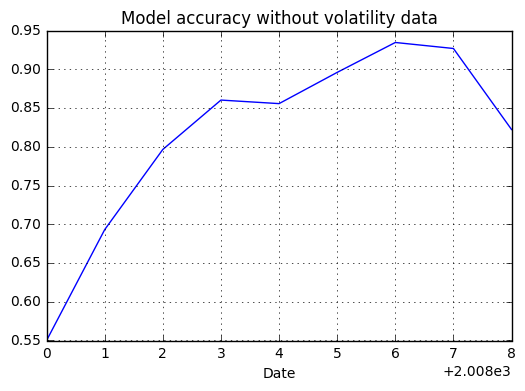

In [9]:
df.groupby(df.Date.dt.year).score_wo_Vol.mean().plot().grid()
plt.title('Model accuracy without volatility data')

In [10]:
data.merge_dataset(exclude_columns=['sub_grade'])
X_train, X_test, y_train, y_test = data.get_train_test_set()
model = RandomForestClassifier(n_estimators=400, n_jobs = -1)
model.fit(X_train,y_train)
score1 = (model.predict(X_test)==y_test).astype(int).to_frame('score_w_Vol')
df = pd.concat([score1, df], axis=1, join='inner')

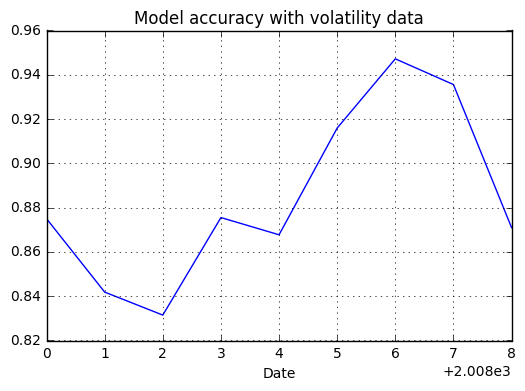

In [11]:
df.groupby(df.Date.dt.year).score_w_Vol.mean().plot().grid()
plt.title('Model accuracy with volatility data')

### Our model performance has greatly improved especially for the volatile period, let's compare 2 graphs

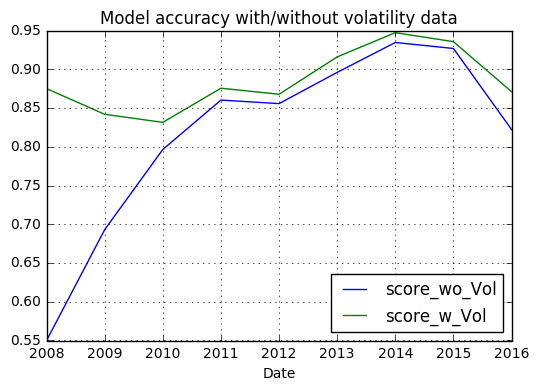

In [20]:
df.groupby(df.Date.dt.year).score_wo_Vol.mean().plot(legend=True).grid()
df.groupby(df.Date.dt.year).score_w_Vol.mean().plot(legend=True).grid()
plt.title('Model accuracy with/without volatility data')
plt.ticklabel_format(useOffset=False)

### The volatility  not only fixed the abnormally low performance during the market crash, but also improved the performance for all times.